# Euler equations: exact solutions

This notebook illustrates some features of the exact solution to the 1-dimensional Euler equations of compressible gas dynamics.

The notebook can be found in the clawpack apps respository:  

- `$CLAW/apps/notebooks/riemann/Riemann_problem_Euler_exact.ipynb`
- See http://www.clawpack.org/apps.html.



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import FileLink


The next cell imports a module containing a function that takes a Riemann problem (left state, right state, and approximate solver), and computes the Riemann solution, as well as functions to plot the solution in various forms.

In [2]:
#from clawpack.riemann import riemann_tools

# the version from clawpack.riemann needs updating, 
# for active development use the version in this repository instead:
import sys
sys.path.insert(0,'..')  
import riemann_tools


We can compute the exact solution to the Riemann problem for the Euler equations.

In [3]:
import Euler_exact_Riemann_solver
FileLink('Euler_exact_Riemann_solver.py')  # Link to examine the exact Riemann solver

/Users/rjl/git/clawpack/apps/notebooks/riemann/Euler_exact_Riemann_solver.py

In [4]:
gamma = 1.4

in_vars = 'primitive'  # so components of q are (rho,u,p)

q_l = np.array((3.,0.,3.))
q_r = np.array((1.,0.,1.))

states, speeds, riemann_eval = Euler_exact_Riemann_solver.exact_riemann_solution(q_l ,q_r, gamma, 
                                                                in_vars=in_vars, out_vars='primitive')

Note that we specified `out_vars = 'primitive'` above, so that the states returned are in terms of the primitive variables (density, velocity, pressure).  This allows us to confirm that the pressure and velocity are constant across the 2-wave (contact discontinuity) and only the density has a jump discontinuity.

Since the phase space is 3-dimensional, we show two different projections, to density-velocity and to density-pressure:

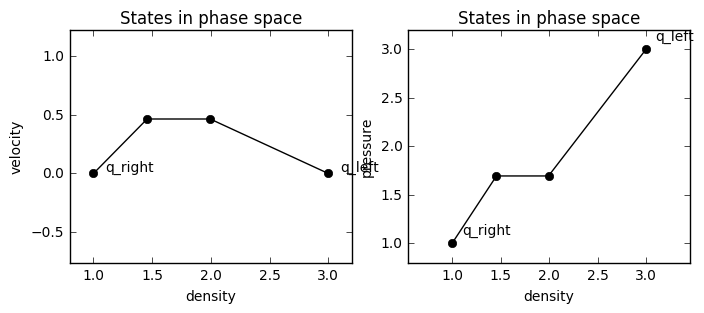

In [5]:
fig = plt.figure(figsize=(8,3))
ax = plt.subplot(1,2,1)
riemann_tools.plot_phase(states, ax=ax, i_h = 0, i_v = 1, label_h='density', label_v='velocity')
ax = plt.subplot(1,2,2)
riemann_tools.plot_phase(states, ax=ax, i_h = 0, i_v = 2, label_h='density', label_v='pressure')

In both cases we see that the variable on the vertical axis is constant between the two middle states.

We can also see this in the solution plotted below.

In [6]:
riemann_tools.JSAnimate_plot_riemann(states,speeds,riemann_eval)

### Plot particle trajectories

Since `q[1]` represents fluid velocity in the primitive equations, we can integrate this to also compute the particle trajectories of gas molecules.  

We choose the number of particles on each side so that the distance between them is inversely proportional to the density on each side.

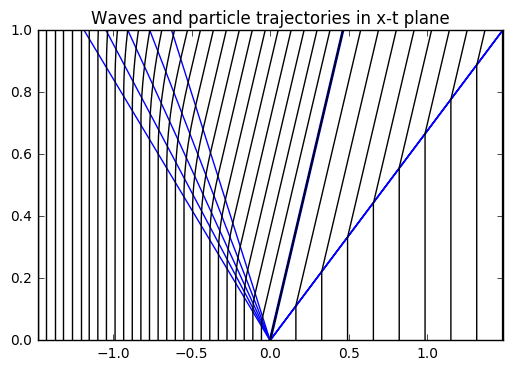

In [7]:
rho_left = q_l[0]
rho_right = q_r[0]
num_right = 10
num_left = 1 + (num_right-1) * rho_left/rho_right

riemann_tools.plot_riemann_trajectories(states,speeds,riemann_eval,i_vel=1,
                                       num_left=num_left, num_right=num_right)

Note that particles are instantaneously accelerated as the shock wave passes by for particles starting at locations $x_0 > 0$, whereas particles starting in the region $x_0 < 0$ are smoothly accelerated as the rarefaction passes.  Both sets of particles reach the same velocity $u^*$ in the intermediate state, and travel parallel to the contact discontinuity (which also has propagation speed $s_2 = u^*$).

Also notice that the the denisty increases across the shock wave (compression wave) whereas it decreases across the rarefaction wave (expansion fan), and that there resulting flow has a discontinuity in density across the contact discontinuity.

### Plot the solution in conservative variables

If we plot the solution in the conservative variables (density, momentum, energy), we see that all three components have jump discontinuities across the contact discontinuity.

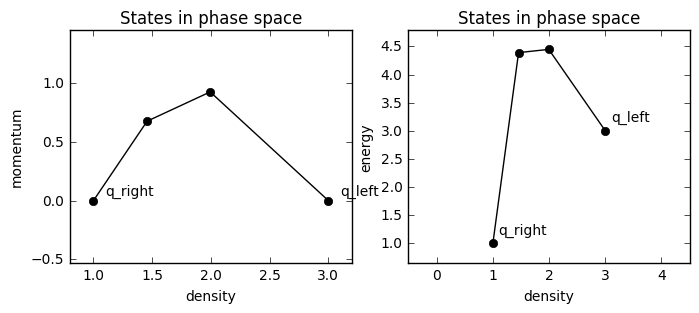

In [8]:
states, speeds, riemann_eval = Euler_exact_Riemann_solver.exact_riemann_solution(q_l ,q_r, gamma, 
                                                                in_vars='primitive', out_vars='conservative')

fig = plt.figure(figsize=(8,3))
ax = plt.subplot(1,2,1)
riemann_tools.plot_phase(states, ax=ax, i_h = 0, i_v = 1, label_h='density', label_v='momentum')
ax = plt.subplot(1,2,2)
riemann_tools.plot_phase(states, ax=ax, i_h = 0, i_v = 2, label_h='density', label_v='energy')

In [9]:
riemann_tools.JSAnimate_plot_riemann(states,speeds,riemann_eval)